In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [99]:
data = pd.read_csv("HV.csv")

Features and Target variables

In [100]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# FOR LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','2W','3W']].values
target = data['SD'].values

Normalize data

In [101]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [102]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

Reshape the input data for all models

In [103]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [104]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/500


3/3 [==============================] - 1s 105ms/step - loss: 558.1862 - val_loss: 543.5616
Epoch 2/500
3/3 [==============================] - 0s 20ms/step - loss: 557.1692 - val_loss: 542.6541
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 556.2086 - val_loss: 541.5628
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 554.9948 - val_loss: 540.1874
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 553.5092 - val_loss: 538.4517
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 551.6384 - val_loss: 536.1836
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 549.1022 - val_loss: 533.0754
Epoch 8/500
3/3 [==============================] - 0s 7ms/step - loss: 545.5690 - val_loss: 528.6876
Epoch 9/500
3/3 [==============================] - 0s 16ms/step - loss: 540.6766 - val_loss: 522.2852
Epoch 10/500
3/3 [==============================] - 0s 16ms/step - loss: 533.6663 - val_loss: 512.

Visualize LSTM results

0.6365027325126936


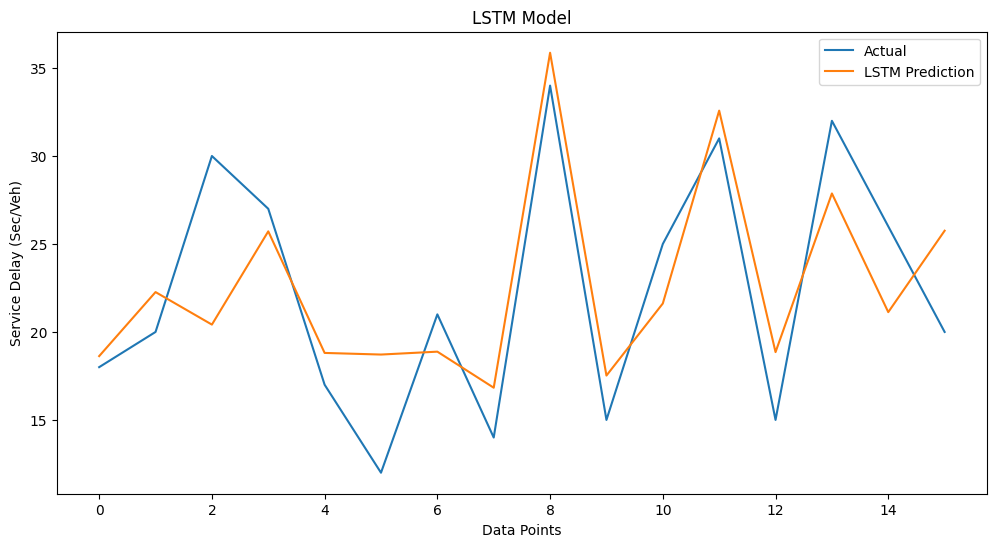

In [105]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [131]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=400, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/400
3/3 [==============================] - 4s 225ms/step - loss: 558.0638 - val_loss: 542.7046
Epoch 2/400
3/3 [==============================] - 0s 10ms/step - loss: 556.0154 - val_loss: 540.6374
Epoch 3/400
3/3 [==============================] - 0s 17ms/step - loss: 553.9020 - val_loss: 537.9673
Epoch 4/400
3/3 [==============================] - 0s 14ms/step - loss: 550.9846 - val_loss: 534.3547
Epoch 5/400
3/3 [==============================] - 0s 17ms/step - loss: 546.9934 - val_loss: 529.2794
Epoch 6/400
3/3 [==============================] - 0s 16ms/step - loss: 541.3812 - val_loss: 521.9396
Epoch 7/400
3/3 [==============================] - 0s 17ms/step - loss: 533.4634 - val_loss: 510.9231
Epoch 8/400
3/3 [==============================] - 0s 18ms/step - loss: 521.2061 - val_loss: 493.3807
Epoch 9/400
3/3 [==============================] - 0s 12ms/step - loss: 502.1892 - val_loss: 463.8600
Epoch 10/400
3/3 [==============================] - 0s 11ms/step - loss: 468.5777

Visualize BiLSTM results

0.7085331138840523


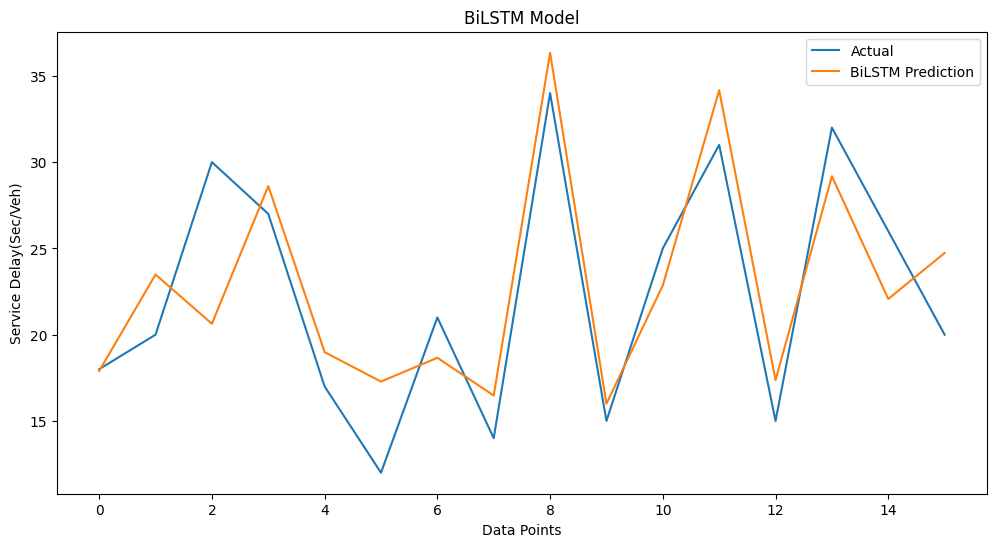

In [132]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [108]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/500
3/3 [==============================] - 2s 111ms/step - loss: 557.4211 - val_loss: 541.8430
Epoch 2/500
3/3 [==============================] - 0s 14ms/step - loss: 555.1144 - val_loss: 539.4528
Epoch 3/500
3/3 [==============================] - 0s 15ms/step - loss: 552.5473 - val_loss: 536.7512
Epoch 4/500
3/3 [==============================] - 0s 16ms/step - loss: 549.7307 - val_loss: 533.4816
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 546.1774 - val_loss: 529.3982
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 541.8958 - val_loss: 524.1392
Epoch 7/500
3/3 [==============================] - 0s 16ms/step - loss: 535.9973 - val_loss: 517.1974
Epoch 8/500
3/3 [==============================] - 0s 16ms/step - loss: 528.3314 - val_loss: 507.7311
Epoch 9/500
3/3 [==============================] - 0s 8ms/step - loss: 518.0635 - val_loss: 494.4268
Epoch 10/500
3/3 [==============================] - 0s 12ms/step - loss: 503.0301 - 

Visualize GRU results

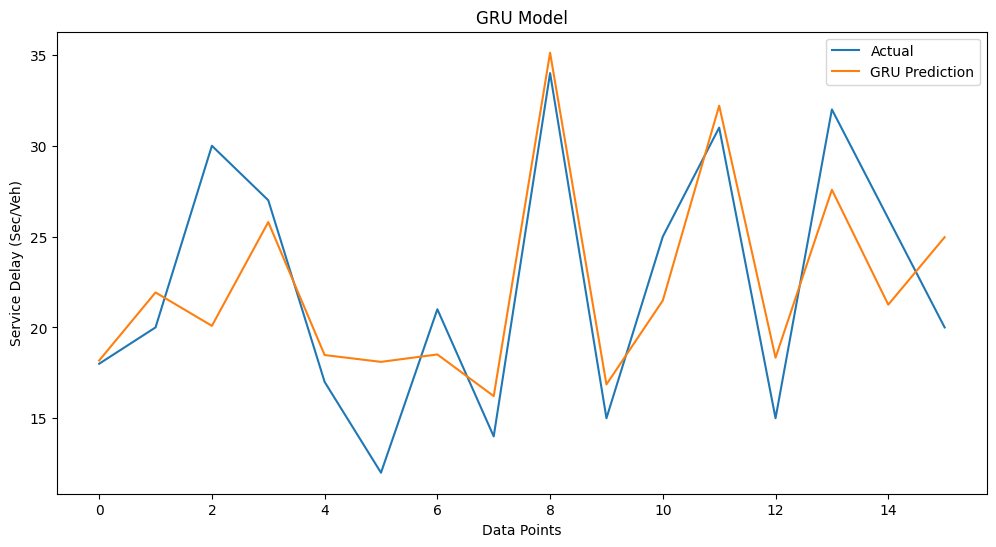

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [110]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/500
3/3 [==============================] - 3s 184ms/step - loss: 556.6697 - val_loss: 538.5927
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 551.2747 - val_loss: 533.0319
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: 545.2298 - val_loss: 526.1886
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 537.6823 - val_loss: 517.2200
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 528.0934 - val_loss: 505.2356
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 514.8753 - val_loss: 488.7503
Epoch 7/500
3/3 [==============================] - 0s 15ms/step - loss: 496.5860 - val_loss: 465.8168
Epoch 8/500
3/3 [==============================] - 0s 17ms/step - loss: 472.0320 - val_loss: 433.4166
Epoch 9/500
3/3 [==============================] - 0s 16ms/step - loss: 436.0793 - val_loss: 385.4418
Epoch 10/500
3/3 [==============================] - 0s 19ms/step - loss: 384.1398

Visualize BiGRU results

0.754008402262418


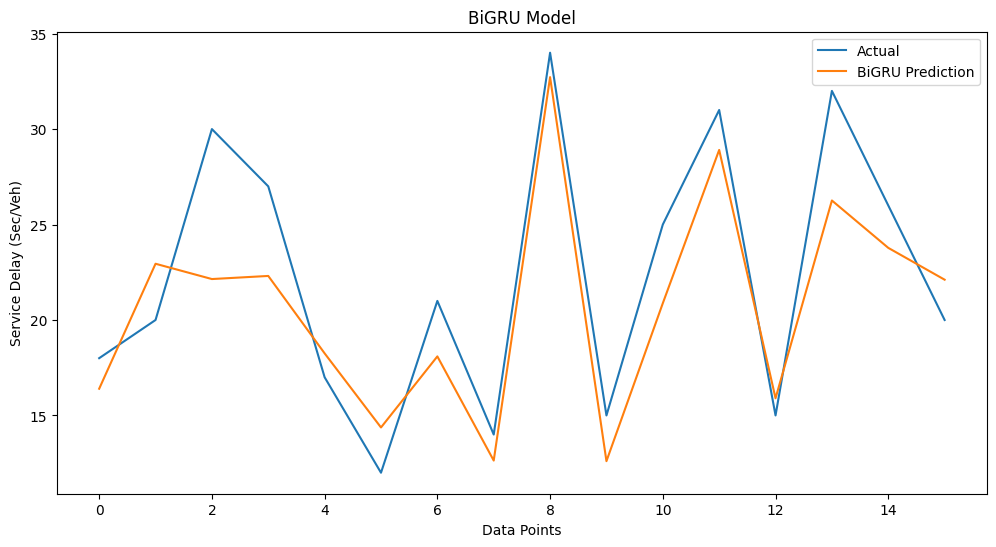

In [111]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [112]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=500, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/500
3/3 [==============================] - 1s 58ms/step - loss: 557.7929 - val_loss: 538.4432
Epoch 2/500
3/3 [==============================] - 0s 10ms/step - loss: 551.2124 - val_loss: 532.9512
Epoch 3/500
3/3 [==============================] - 0s 15ms/step - loss: 545.5467 - val_loss: 527.5865
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 539.8059 - val_loss: 521.8361
Epoch 5/500
3/3 [==============================] - 0s 18ms/step - loss: 533.7717 - val_loss: 515.1686
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 526.9001 - val_loss: 507.4171
Epoch 7/500
3/3 [==============================] - 0s 19ms/step - loss: 518.5862 - val_loss: 498.4708
Epoch 8/500
3/3 [==============================] - 0s 58ms/step - loss: 509.1105 - val_loss: 488.0735
Epoch 9/500
3/3 [==============================] - 0s 18ms/step - loss: 497.9742 - val_loss: 475.9586
Epoch 10/500
3/3 [==============================] - 0s 16ms/step - loss: 484.9888 

Visualize CNN results

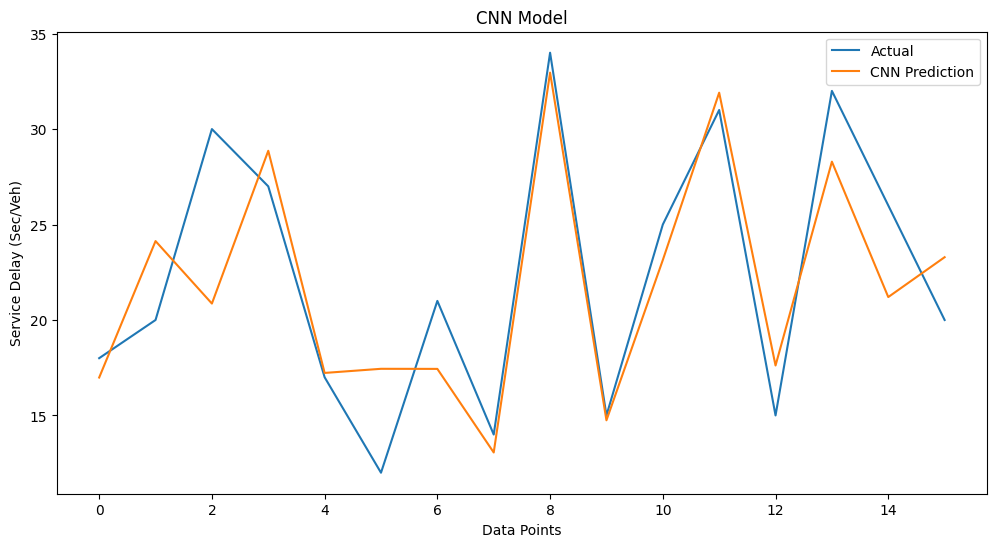

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [114]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/500
3/3 [==============================] - 1s 126ms/step - loss: 557.0757 - val_loss: 541.3785
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 554.6221 - val_loss: 539.0368
Epoch 3/500
3/3 [==============================] - 0s 18ms/step - loss: 552.2306 - val_loss: 536.4037
Epoch 4/500
3/3 [==============================] - 0s 15ms/step - loss: 549.5418 - val_loss: 533.2841
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 546.1710 - val_loss: 529.4895
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 542.0640 - val_loss: 524.7570
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 537.2675 - val_loss: 518.7704
Epoch 8/500
3/3 [==============================] - 0s 18ms/step - loss: 530.8893 - val_loss: 510.8976
Epoch 9/500
3/3 [==============================] - 0s 15ms/step - loss: 522.4685 - val_loss: 500.4660
Epoch 10/500
3/3 [==============================] - 0s 13ms/step - loss: 511.0540 -

Visualize CNN_LSTM results

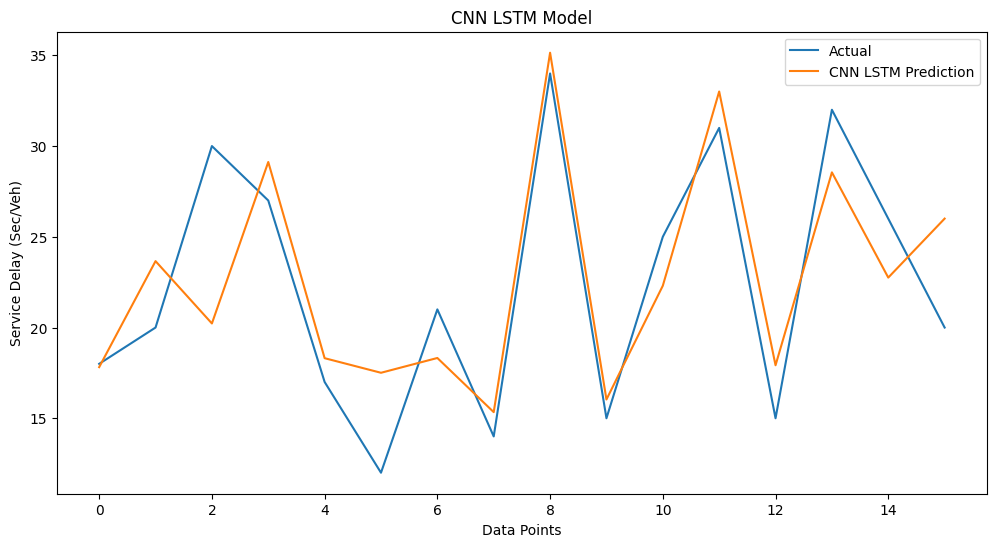

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [116]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/500
3/3 [==============================] - 4s 183ms/step - loss: 557.6610 - val_loss: 541.4988
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 554.7520 - val_loss: 538.4639
Epoch 3/500
3/3 [==============================] - 0s 14ms/step - loss: 551.4301 - val_loss: 535.0499
Epoch 4/500
3/3 [==============================] - 0s 8ms/step - loss: 547.9039 - val_loss: 531.0626
Epoch 5/500
3/3 [==============================] - 0s 12ms/step - loss: 543.7153 - val_loss: 526.1741
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 538.3694 - val_loss: 520.0673
Epoch 7/500
3/3 [==============================] - 0s 19ms/step - loss: 532.2595 - val_loss: 512.1732
Epoch 8/500
3/3 [==============================] - 0s 12ms/step - loss: 523.9345 - val_loss: 501.7840
Epoch 9/500
3/3 [==============================] - 0s 17ms/step - loss: 512.3939 - val_loss: 487.9532
Epoch 10/500
3/3 [==============================] - 0s 17ms/step - loss: 498.3732 

Visualize CNN_BiLSTM results

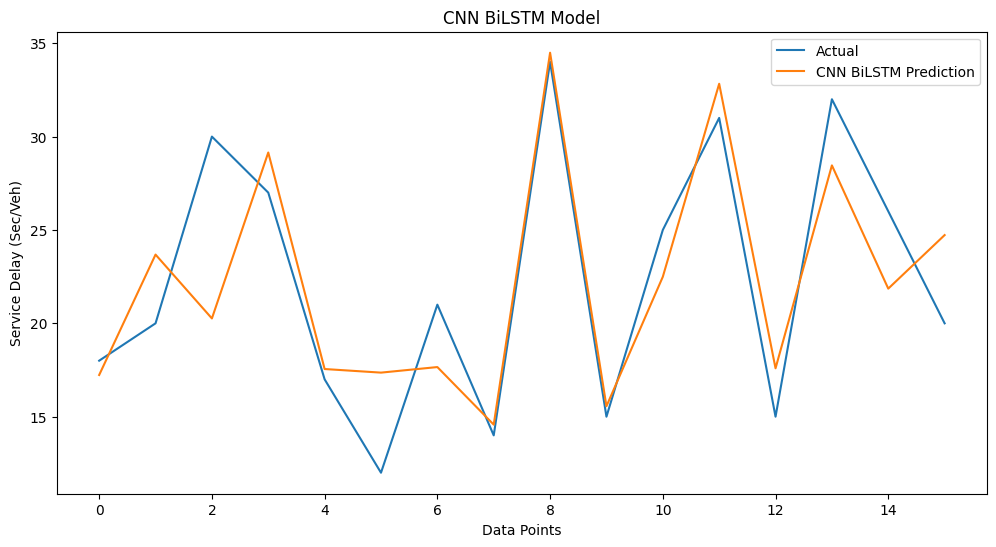

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [133]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

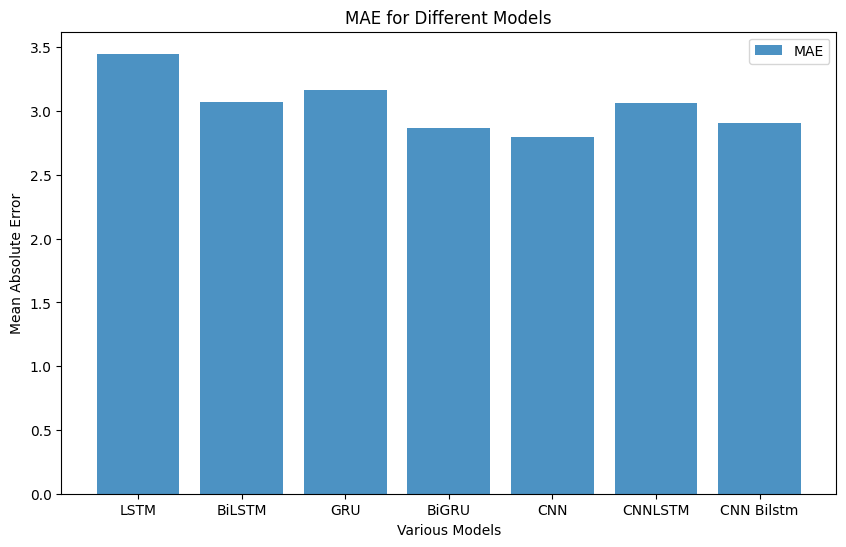

In [134]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

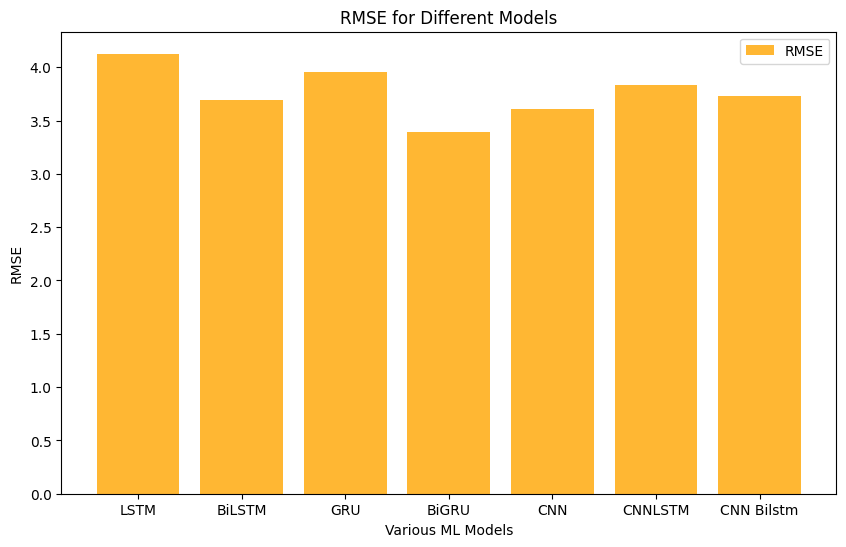

In [135]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

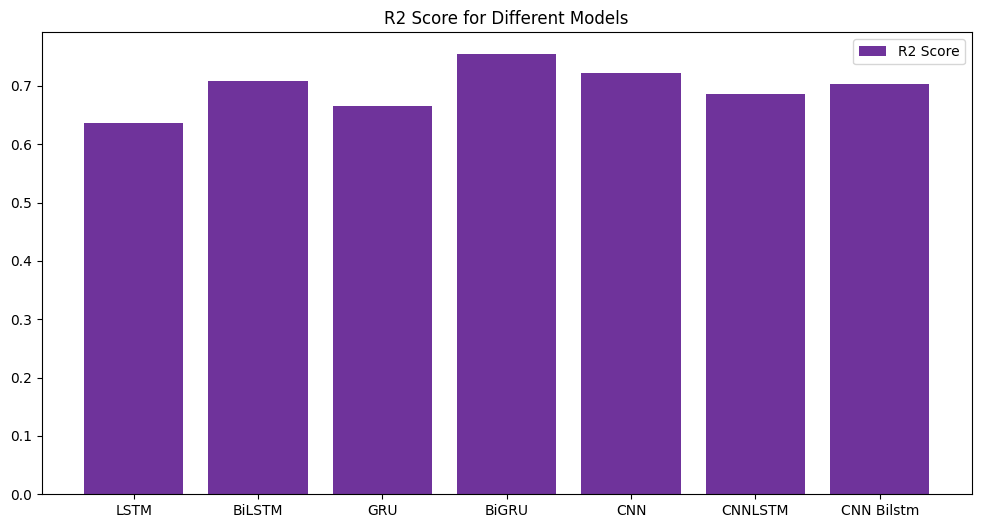

In [136]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [138]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 3.449713110923767
LSTM MSE: 4.1262761919989535
LSTM R2 Score: 0.6365027325126936

BiLSTM MAE: 3.07198303937912
BiLSTM MSE: 3.694896940913243
BiLSTM R2 Score: 0.7085331138840523

GRU MAE: 3.167522668838501
GRU MSE: 3.9560769447720148
GRU R2 Score: 0.6658711144194054

BiGRU MAE: 2.865510642528534
BiGRU MSE: 3.394437803501663
BiGRU R2 Score: 0.754008402262418

CNN MAE: 2.7997480034828186
CNN MSE: 3.607564866399469
CNN R2 Score: 0.7221484269942763

CNN LSTM MAE: 3.0672589540481567
CNN LSTM MSE: 3.8339380272438026
CNN LSTM R2 Score: 0.686184247855308

CNN BiLSTM MAE: 2.9095768332481384
CNN BiLSTM MSE: 3.733820322020363
CNN BiLSTM R2 Score: 0.7023599337448208


Plot predictions for each model

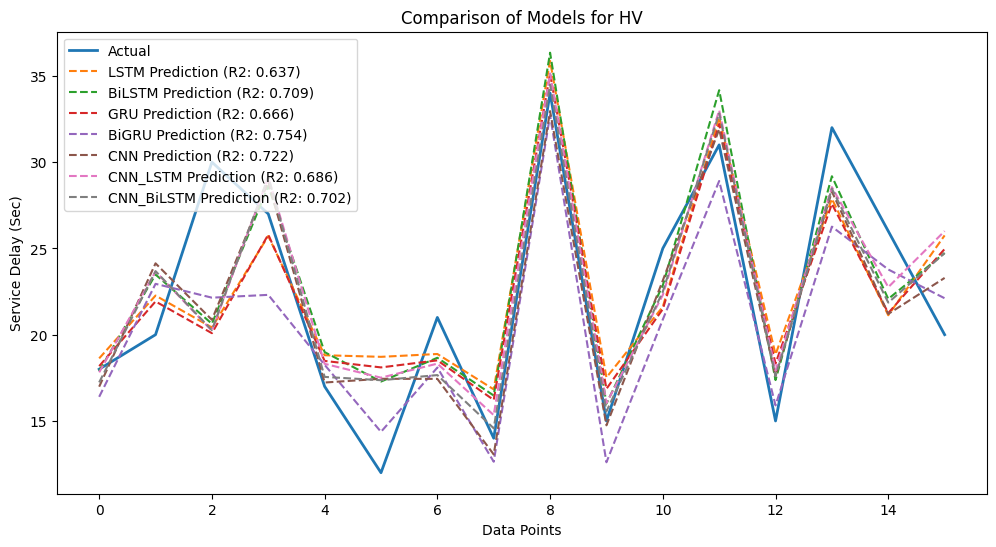

In [140]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for HV')
plt.show()

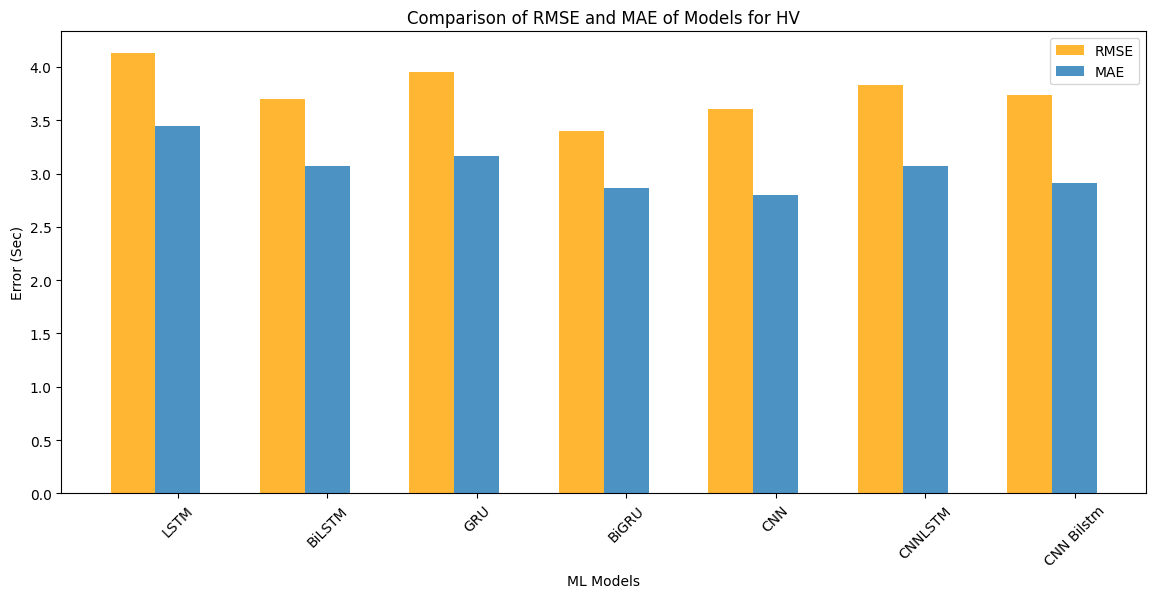

In [141]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for HV')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()